In [1]:
import nltk

In [2]:
# Nous allons utiliser un DataSet à partir des DataSet UCI! https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
# Le fichier que nous utilisons contient une collection de plus de 5 000 messages SMS.
# Allons-y, utilisez rstrip () plus une liste de compréhension pour obtenir une liste de toutes les lignes de messages texte:

messages = [line.rstrip() for line in open('./Data/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [4]:
import pandas as pd


In [5]:
messages = pd.read_csv('./Data/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Utilisons groupby pour utiliser describe() par label, de cette façon nous pouvons commencer à penser 
# aux prédicteurs qui séparent le ham et le spam!

messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
# Faisons une nouvelle colonne pour détecter la taille des messages texte:

messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Visualisation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot: ylabel='Frequency'>

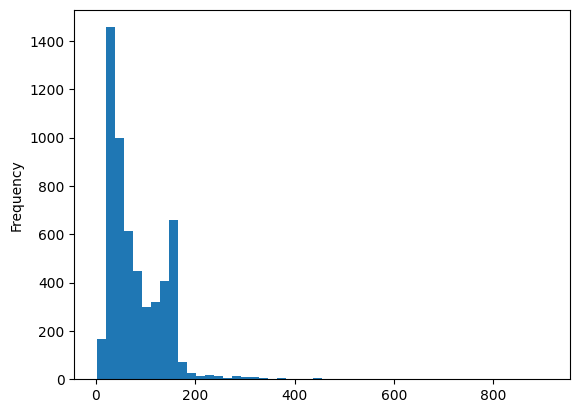

In [10]:
messages['length'].plot(bins=50, kind='hist') 

In [11]:
# On dirait que la longueur du texte peut être une bonne caractéristique à penser! Essayons d'expliquer pourquoi 
# l'axe des abscisses va jusqu'à 1000, cela signifie qu'il y a un message très long!

messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

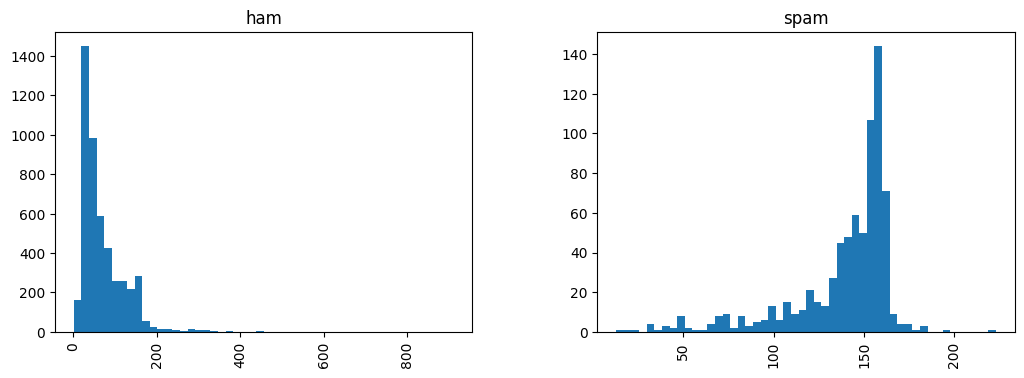

In [12]:
# Concentrons-nous sur l'idée d'essayer de voir si la durée du message 
# est une caractéristique distinctive entre hamet spam:

messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [13]:
import string

mess = 'Sample message! Notice: it has punctuation..'

#Vérifiez les caractères pour voir s'ils sont des ponctuations
nopunc = [char for char in mess if char not in string.punctuation]

# Rejoignez les caractères pour former la chaîne.
nopunc = ''.join(nopunc)

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hadoop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
## Voyons maintenant comment supprimer les stopwords . Nous pouvons importer une liste de mots-clés anglais de 
# NLTK (vérifiez la documentation pour plus de langues et d'informations).
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Afficher quelques stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [17]:
# Maintenant, supprimez simplement les stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [18]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Vérifiez les caractères pour voir s'ils sont des ponctuations
    nopunc = [char for char in mess if char not in string.punctuation]

    # Rejoignez les caractères pour former la chaîne.
    nopunc = ''.join(nopunc)
    
    # supprimez stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#Assurez-vous qu'il fonctionne
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [21]:
# Afficher le dataframe original 
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
## Fin partie-0

In [23]:
#nltk.download_shell()

/*********************/

Normalization continue
Il existe de nombreuses façons de continuer à normaliser ce texte. Tels que Stemming ou en distinguant par part of speech..

NLTK possède de nombreux outils intégrés et une excellente documentation sur beaucoup de ces méthodes. Parfois, ils ne fonctionnent pas bien pour les messages texte en raison de la façon dont beaucoup de gens ont tendance à utiliser les abréviations ou la sténographie. Par exemple:           'Nah dawg, IDK! Wut time u headin to da club?'      contre

     'No dog, I don't know! What time are you heading to the club?'      Certaines méthodes de normalisation de texte auront des problèmes avec ce type de raccourci et je vous laisse donc explorer ces méthodes plus avancées par le biais du livre NLTK en ligne.

Pour l'instant, nous nous concentrerons uniquement sur l'utilisation de ce que nous devons convertir notre liste de mots en un vecteur que SciKit-Learn peut utiliser.

Vectorisation
Actuellement, nous avons les messages en tant que listes de tokens (également appelés lemmas) et maintenant nous Besoin de convertir chacun de ces messages en un vecteur avec lequel les modèles d'algorithme SciKit Learn peuvent fonctionner.

Maintenant, nous allons convertir chaque message, représenté comme une liste de tokens (lemmes) ci-dessus, en un vecteur que les modèles d'apprentissage peuvent comprendre.

Nous allons le faire en trois étapes en utilisant le modèle bag-of-words:

Compte combien de fois un mot se produit dans chaque message (connu sous le nom de fréquence de terme)

Peser les comptes, de sorte que les tokens fréquents obtiennent un poids plus faible (fréquence de document inverse)

Normaliser les vecteurs à la longueur de l'unité, à l'abstraction de la longueur du texte original (norme L2)

Commençons la première étape:

Chaque vecteur aura autant de dimensions qu'il y a de mots uniques dans le corpus SMS. Nous allons d'abord utiliser SciKit Learn CountVectorizer . Ce modèle convertira une collection de documents texte en une matrice de comptage de jetons.

Nous pouvons l'imaginer comme une matrice bidimensionnelle. Lorsque la dimension 1 est le vocabulaire entier (1 ligne par mot) et l'autre dimension sont les documents réels, dans ce cas une colonne par message texte.

Par exemple:

<table border = “1“>

Message 1 Message 2 ... Message N </tr>

Word 1 Count01...0 </tr>

Word 2 Count00...0 </tr>

... 12...0 </tr>

Word N Count 01...1 </tr> </table>

Comme il y a tellement de messages, on peut s'attendre à beaucoup de comptes zéro pour la présence de ce mot dans ce document. De ce fait, SciKit Learn produira une Sparse Matrix.

/*************/

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

#Nombre total de vocabulaire
print(len(bow_transformer.vocabulary_))


11425


In [26]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [27]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [28]:
# Cela signifie qu'il y a sept mots uniques dans le message numéro 4 (après avoir supprimé les mots d'arrêt communs). Deux d'entre eux apparaissent deux fois, le reste, une seule fois. 
# Allons-y, vérifiez et confirmez ceux qui apparaissent deux fois:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

UIN
schedule


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
messages_bow = bow_transformer.transform(messages['message'])

In [30]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [31]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


/***************/


Alors, qu'est-ce que TF-IDF?
TF-IDF représente la fréquence du document à fréquence inverse et le poids du tf-idf est un poids souvent utilisé dans la récupération d'informations et l'extraction de texte. Ce poids est une mesure statistique utilisée pour évaluer l'importance d'un mot pour un document dans une collection ou un corpus. L'importance augmente proportionnellement au nombre de fois qu'un mot apparaît dans le document mais est compensé par la fréquence du mot dans le corpus. Des variations du schéma de pondération de tf-idf sont souvent utilisées par les moteurs de recherche comme outil central de notation et classement de la pertinence d'un document, compte tenu d'une requête d'utilisateur.

L'une des fonctions de classement les plus simples est calculée en additionnant le tf-idf pour chaque terme de requête; Beaucoup de fonctions de classement plus sophistiquées sont des variantes de ce modèle simple.

Typiquement, le poids de tf-idf est composé de deux termes: le premier calcule la fréquence de fréquence normalisée (TF), aka. Le nombre de fois qu'un mot apparaît dans un document, divisé par le nombre total de mots dans ce document; Le deuxième terme est la Fréquence de document inverse (IDF), calculé comme le logarithme du nombre de documents dans le corpus divisé par le nombre de documents où le terme spécifique apparaît.

TF: Term Frequency , qui mesure la fréquence à laquelle un terme se produit dans un document. Étant donné que chaque document est différent, il est possible qu'un terme apparaisse beaucoup plus souvent dans des documents longs que plus courts. Ainsi, le terme fréquence est souvent divisé par la longueur du document (aka: le nombre total de termes dans le document) comme moyen de normalisation:

TF (t) = (Nombre de fois que le terme t apparaît dans un document) / (Nombre total de termes dans le document). *
IDF: Fréquence de document inversé , qui mesure l'importance d'un terme. En calculant TF, tous les termes sont considérés comme tout aussi importants. Cependant, il est connu que certains termes, tels que "is", "of", et "that", peuvent apparaître beaucoup de fois mais ont peu d'importance. Ainsi, nous devons peser les termes fréquents tout en augmentant les rares, en calculant ce qui suit:

IDF (t) = log_e (Nombre total de documents / Nombre de documents avec le terme t dedans). *
Voir ci-dessous un exemple simple.

Exemple:

Considérons un document contenant 100 mots dans lequel le mot chat apparaît 3 fois.

Le terme fréquence (c'est-à-dire tf) pour chat est alors (3/100) = 0,03. Maintenant, supposons que nous avons 10 millions de documents et que le mot chat apparaît dans un millier d'entre eux. Ensuite, la fréquence de document inverse (c'est-à-dire idf) est calculée comme log (10 000 000/1 000) = 4. Ainsi, le poids Tf-idf est le produit de ces quantités: 0,03 * 4 = 0,12.

Voyons comment nous pouvons le faire dans SciKit Learn:


/*****************/

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [33]:
# Vérifions ce qu'est le IDF (fréquence de document inverse) du mot " u " et de mot " university "?

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [ ]:
# Transformons tout le corpus de bag-of-words en corpus TF-IDF à la fois:

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

/*******************/

Formation d'un modèle
Avec les messages représentés comme des vecteurs, nous pouvons finalement former notre classificateur de spam / ham. Maintenant, nous pouvons utiliser presque n'importe quel type d'algorithmes de classification. Pour une variété de raisons, l'algorithme du classificateur Naive Bayes est un bon choix .

Nous allons utiliser scikit-learn ici, en choisissant le classificateur Naive Bayes pour commencer:


/********************/

In [34]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

NameError: name 'messages_tfidf' is not defined

In [ ]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

/*********************/

Evaluation du modèle¶
Nous voulons déterminer dans quelle mesure notre modèle fera sur l'ensemble du "DataSet". Commençons par obtenir toutes les prédictions:

/*********************/

In [35]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

NameError: name 'spam_detect_model' is not defined

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

/************************/

Il existe de nombreuses mesures possibles pour évaluer les performances du modèle. Lequel est le plus important dépend de la tâche et des effets commerciaux des décisions basées sur le modèle. Par exemple, le coût de la mauvaise prédiction de «spam» en tant que «ham» est probablement beaucoup plus faible que le «ham» mal prédit comme «spam».

Note: Dans l'évaluation ci-dessus, nous avons évalué l'exactitude sur les mêmes données que nous avons utilisées pour la formation. Vous ne devriez jamais évaluer sur le même ensemble de données sur lequel vous vous entraînez!

Une telle évaluation ne nous dit rien sur le véritable pouvoir prédictif de notre modèle. Si nous nous souvenions simplement de chaque exemple lors de la formation, l'exactitude des données de formation serait trivialement égale à 100%, même si nous ne serions pas en mesure de classer les nouveaux messages.

Une manière appropriée est de diviser les données en deux sous ensemble train / test, où le modèle n'a jamais vu les données de formation lors de son ajustement et de son réglage de paramètres. Les données de test ne sont jamais utilisées en aucune façon. C'est alors que notre évaluation finale sur les données d'essai est représentative de la vraisemblance prédictive.


/*************************/

In [ ]:
## Train Test Split

from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

In [ ]:
## Création d'un pipeline de données

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
print(classification_report(predictions,label_test))

/***********************/

Documentations
Consultez les liens ci-dessous pour plus d'informations sur le traitement du langage naturel:

livre en ligne NLTK

Kaggle

SciKit Learn


/************************/